# 1. 이미지 매칭
 - 평균 해시 매칭(Average Hash Matching)

# 2.이미지 특징점 검출
 - 해리스 코너 검출(Harris Corner Detection)
 - 시-토마시 검출(Shi & Tomasi Detection)
 - GFTTDetector
 - FAST(Feature from Accelerated Segment Test)
 - SimpleBlobDetector

#### 라이브러리

In [ ]:
# installs
#!pip install pytesseract
#!pip install pafy
#!pip install youtube_dl


# pytorch
import torch


# OpenCV, OCR
import cv2
import pytesseract
from skimage.transform import resize


# Youtube video
import pafy
import cv2


# Visualizatipn
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc('font', family='malgun gothic')
plt.rc('axes', unicode_minus=False)

# time
from time import time

#### 차량 진입 사진 로드

In [ ]:
import numpy as np
def imread(filename, flags=cv2.IMREAD_COLOR, dtype=np.uint8):
    try:
        n = np.fromfile(filename, dtype)
        img = cv2.imdecode(n, flags)
        return img
    except Exception as e:
        print(e)
        return None

In [ ]:
greencar01 = imread('./car_image/그린카진입01.jpg')
greencar02 = imread('./car_image/그린카진입02.jpg')
socar01 = imread('./car_image/쏘카진입01.jpg')
socar02 = imread('./car_image/쏘카진입02.jpg')

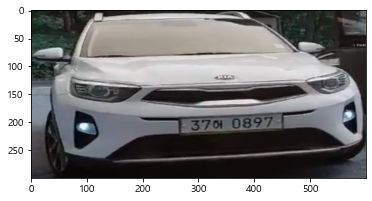

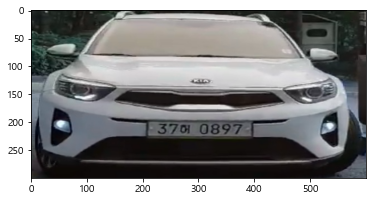

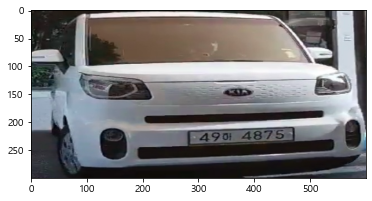

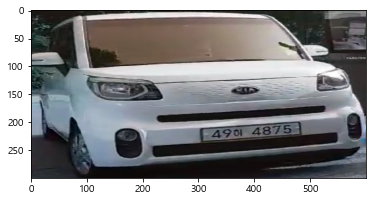

In [ ]:
plt.imshow(greencar01); plt.show()
plt.imshow(greencar02); plt.show()
plt.imshow(socar01); plt.show()
plt.imshow(socar02); plt.show()


In [ ]:
import numpy as np

In [ ]:
car_images = [greencar01, greencar02, socar01, socar02]

### 1. 이미지 매칭
#### 평균 해시 매칭(Average Hash Matching)

[[0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
1ff1ff1ff1fffff8000000000000000000000000000000000000000000000000000001ff3ffffffffe00000000000000000000000000000000000000000000000000000ff7fe00000000000000000000000000000000000000000000000000001ffffffffff800000000000000000000000000000000000000000000000000807ffff000000000000000000000ffffffffffffffffffffffe00000003ff80000f1ffe00000000000000000000000000000000000000000000000000027f1fff00000000000000007fffffffffffffffffffffffffffffffffffe00000007fffc000000000000000000000000000000000000000000000000003ff3fff000000000003fffffffffffffffffffffffffffffffffffffffffffe00007fffe0000000000000000000000000000000000000000000000000027f3fff000000003ffffffffffffffffffffffffffffffffffffffffffffffffc000ffff0000000000000000000000000000000000000000000000000000f7fff000000fffffffffffffffffffffffffffffffffffffffffffffffffffff803fffc00000000000000000000000000000000000000000000000001ff7fff001ffffff

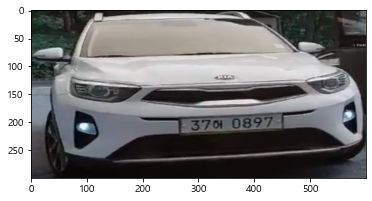

In [ ]:
#영상 읽어서 그레이 스케일로 변환
car_image = greencar01
copy_img = car_image.copy()
gray = cv2.cvtColor(copy_img, cv2.COLOR_BGR2GRAY)

# 8x8 크기로 축소 ---①
gray = cv2.resize(gray, (600,300)) # 원하는 크기로 조정
# 영상의 평균값 구하기 ---②
avg = gray.mean()
# 평균값을 기준으로 0과 1로 변환 ---③
bin = 1 * (gray > avg)
print(bin)

# 2진수 문자열을 16진수 문자열로 변환 ---④
dhash = []
for row in bin.tolist():
    s = ''.join([str(i) for i in row])
    dhash.append('%02x'%(int(s,2)))
dhash = ''.join(dhash)
print(dhash)

plt.imshow(copy_img)
plt.show()

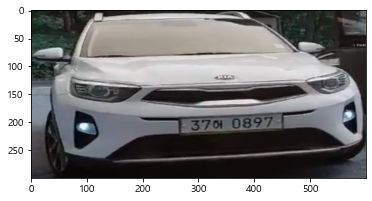

158.15234375


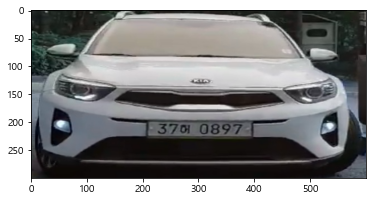

In [ ]:
# 영상 읽기 및 표시
img = greencar01
plt.imshow(img)
plt.show()

# 비교할 영상들이 있는 경로 ---①
search_dir = '../img/101_ObjectCategories'

# 이미지를 16x16 크기의 평균 해쉬로 변환 ---②
def img2hash(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray = cv2.resize(gray, (600, 300))
    avg = gray.mean()
    bi = 1 * (gray > avg)
    return bi

# 해밍거리 측정 함수 ---③
def hamming_distance(a, b):
    a = a.reshape(1,-1)
    b = b.reshape(1,-1)
    # 같은 자리의 값이 서로 다른 것들의 합
    distance = (a !=b).sum()
    return distance

# 차 영상의 해쉬 구하기 ---④
query_hash = img2hash(img)

# 이미지 데이타 셋 디렉토리의 모든 영상 파일 경로 ---⑤
# 데이타 셋 영상 한개 읽어서 표시 ---⑥
img = greencar02
# 데이타 셋 영상 한개의 해시  ---⑦
a_hash = img2hash(img)
# 해밍 거리 산출 ---⑧
dst = hamming_distance(query_hash, a_hash)
print(dst/256)
if dst/256 < 200: # 해밍거리 25% 이내만 출력 ---⑨
    plt.imshow(img)
    plt.show()



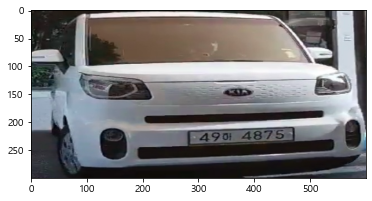

140.94140625


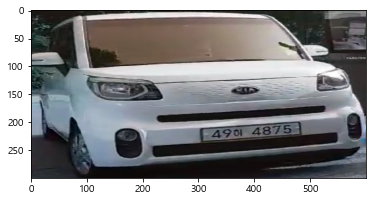

In [ ]:
# 영상 읽기 및 표시
img = socar01
plt.imshow(img)
plt.show()

# 비교할 영상들이 있는 경로 ---①
search_dir = '../img/101_ObjectCategories'

# 이미지를 16x16 크기의 평균 해쉬로 변환 ---②
def img2hash(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray = cv2.resize(gray, (600, 300))
    avg = gray.mean()
    bi = 1 * (gray > avg)
    return bi

# 해밍거리 측정 함수 ---③
def hamming_distance(a, b):
    a = a.reshape(1,-1)
    b = b.reshape(1,-1)
    # 같은 자리의 값이 서로 다른 것들의 합
    distance = (a !=b).sum()
    return distance

# 차 영상의 해쉬 구하기 ---④
query_hash = img2hash(img)

# 이미지 데이타 셋 디렉토리의 모든 영상 파일 경로 ---⑤
# 데이타 셋 영상 한개 읽어서 표시 ---⑥
img = socar02
# 데이타 셋 영상 한개의 해시  ---⑦
a_hash = img2hash(img)
# 해밍 거리 산출 ---⑧
dst = hamming_distance(query_hash, a_hash)
print(dst/256)
if dst/256 < 200: # 해밍거리 25% 이내만 출력 ---⑨
    plt.imshow(img)
    plt.show()



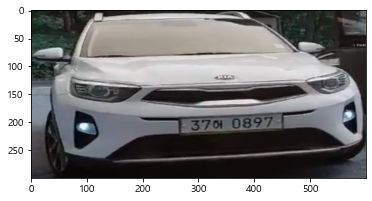

239.0234375


In [ ]:
# 영상 읽기 및 표시
img = greencar01
plt.imshow(img)
plt.show()

# 비교할 영상들이 있는 경로 ---①
search_dir = '../img/101_ObjectCategories'

# 이미지를 16x16 크기의 평균 해쉬로 변환 ---②
def img2hash(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray = cv2.resize(gray, (600, 300))
    avg = gray.mean()
    bi = 1 * (gray > avg)
    return bi

# 해밍거리 측정 함수 ---③
def hamming_distance(a, b):
    a = a.reshape(1,-1)
    b = b.reshape(1,-1)
    # 같은 자리의 값이 서로 다른 것들의 합
    distance = (a !=b).sum()
    return distance

# 차 영상의 해쉬 구하기 ---④
query_hash = img2hash(img)

# 이미지 데이타 셋 디렉토리의 모든 영상 파일 경로 ---⑤
# 데이타 셋 영상 한개 읽어서 표시 ---⑥
img = socar01
# 데이타 셋 영상 한개의 해시  ---⑦
a_hash = img2hash(img)
# 해밍 거리 산출 ---⑧
dst = hamming_distance(query_hash, a_hash)
print(dst/256)
if dst/256 < 200: # 해밍거리 25% 이내만 출력 ---⑨
    plt.imshow(img)
    plt.show()



### 2. 이미지 특징점 검출
#### 해리스 코너 검출(Harris Corner Detection)

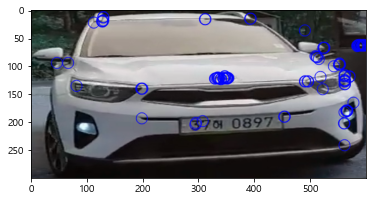

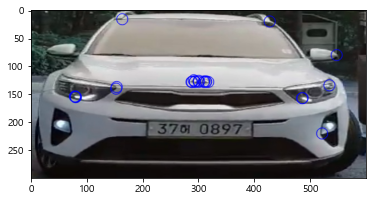

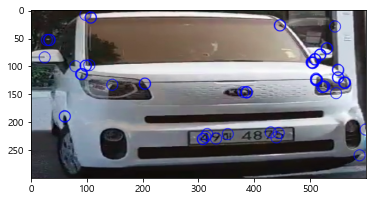

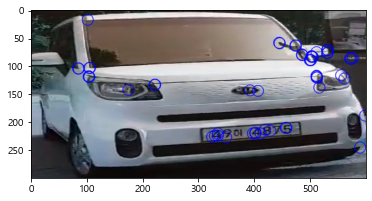

In [ ]:
for car_image in car_images:

    # 해리스 코너 검출 (corner_harris.py)
    copy_img = car_image.copy()
    gray = cv2.cvtColor(copy_img, cv2.COLOR_BGR2GRAY)

    # 해리스 코너 검출 ---①
    corner = cv2.cornerHarris(gray, 2, 3, 0.1)
    # 변화량 결과의 최대값 10% 이상의 좌표 구하기 ---②
    coord = np.where(corner > 0.15* corner.max())
    coord = np.stack((coord[1], coord[0]), axis=-1)

    # 코너 좌표에 동그리미 그리기 ---③
    for x, y in coord:
        cv2.circle(copy_img, (x,y), 10, (0,0,255), 1, cv2.LINE_AA)

    plt.imshow(copy_img)
    plt.show()

#### 시-토마시 검출(Shi & Tomasi Detection)

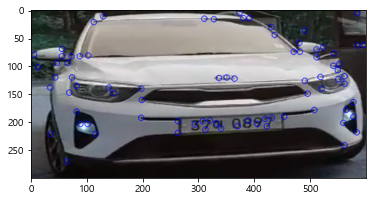

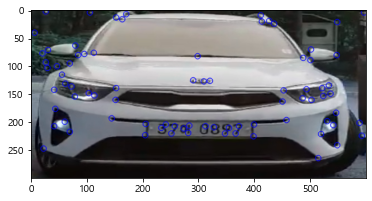

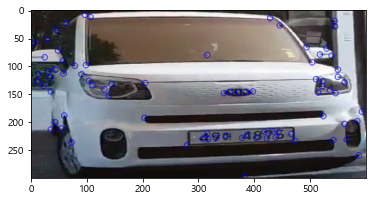

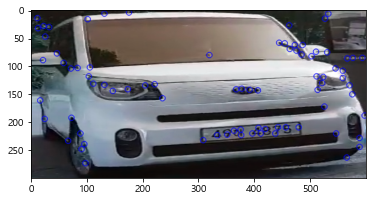

In [ ]:
for car_image in car_images:

    # 시와 토마시 코너 검출 (corner_goodFeature.py)
    copy_img = car_image.copy()
    gray = cv2.cvtColor(copy_img, cv2.COLOR_BGR2GRAY)

    # 시-토마스의 코너 검출 메서드
    corners = cv2.goodFeaturesToTrack(gray, 80, 0.01, 10)
    # 실수 좌표를 정수 좌표로 변환
    corners = np.int32(corners)

    # 좌표에 동그라미 표시
    for corner in corners:
        x, y = corner[0]
        cv2.circle(copy_img, (x, y), 5, (0,0,255), 1, cv2.LINE_AA)

    plt.imshow(copy_img)
    plt.show()

#### GFTTDetector

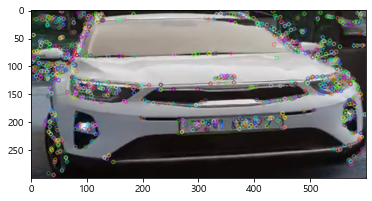

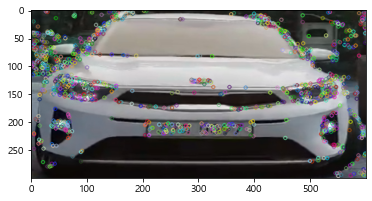

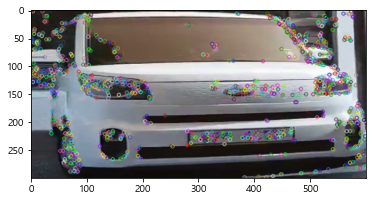

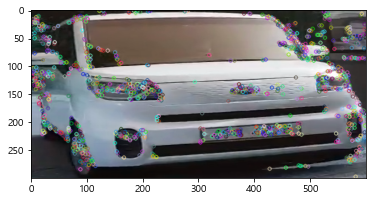

In [ ]:
for car_image in car_images:

    # GFTTDetector로 특징점 검출 (kpt_gftt.py)
    copy_img = car_image.copy()
    gray = cv2.cvtColor(copy_img, cv2.COLOR_BGR2GRAY)

    # Good feature to trac 검출기 생성 ---①
    gftt = cv2.GFTTDetector_create()
    # 특징점 검출 ---②
    keypoints = gftt.detect(gray, None)
    # 특징점 그리기 ---③
    img_draw = cv2.drawKeypoints(copy_img, keypoints, None)

    # 결과 출력 ---④
    plt.imshow(img_draw)
    plt.show()

#### FAST(Feature from Accelerated Segment Test)

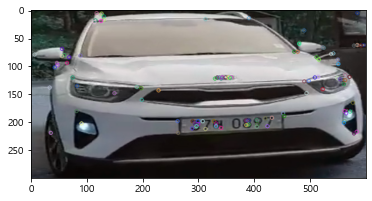

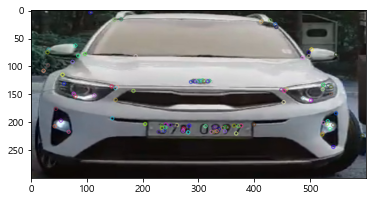

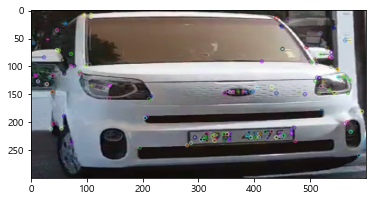

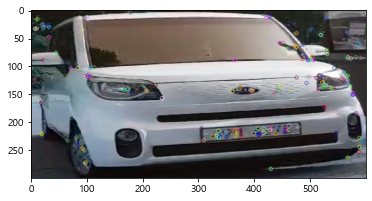

In [ ]:
for car_image in car_images:

    # FAST로 특징점 검출 (kpt_fast.py)
    copy_img = car_image.copy()
    gray = cv2.cvtColor(copy_img, cv2.COLOR_BGR2GRAY)

    # FASt 특징 검출기 생성 ---①
    fast = cv2.FastFeatureDetector_create(50)
    # 특징점 검출 ---②
    keypoints = fast.detect(gray, None)
    # 특징점 그리기 ---③
    draw_img = cv2.drawKeypoints(copy_img, keypoints, None)
    # 결과 출력 ---④
    plt.imshow(draw_img)
    plt.show()

#### SimpleBlobDetector

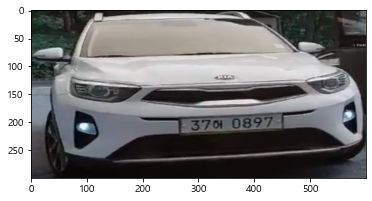

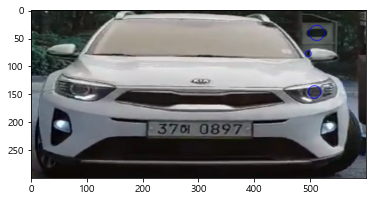

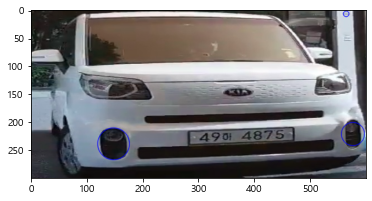

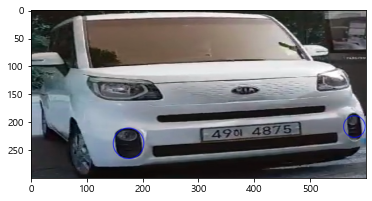

In [ ]:
for car_image in car_images:

    # SimpleBolbDetector 검출기 (kpt_blob.py)
    copy_img = car_image.copy()
    gray = cv2.cvtColor(copy_img, cv2.COLOR_BGR2GRAY)

    # SimpleBlobDetector 생성 ---①
    detector = cv2.SimpleBlobDetector_create()
    # 키 포인트 검출 ---②
    keypoints = detector.detect(gray)
    # 키 포인트를 빨간색으로 표시 ---③
    draw_img = cv2.drawKeypoints(copy_img, keypoints, None, (0,0,255),\
                    flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    # 결과 출력 ---④
    plt.imshow(draw_img)
    plt.show()

#### SimpleBlobDetector 필터 옵션 주어 실행

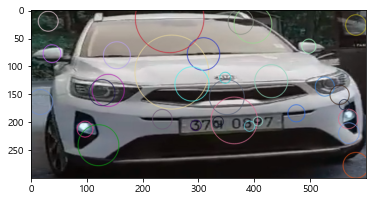

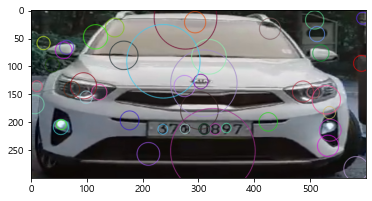

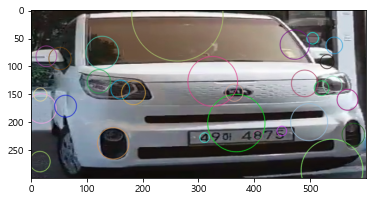

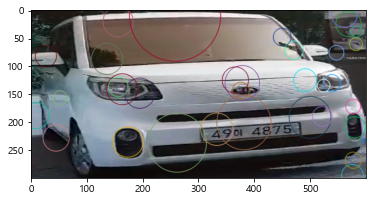

In [ ]:
for car_image in car_images:

    # 필터 옵션으로 생성한 SimpleBlobDetector 검출기 (kpt_blob_param.py)
    copy_img = car_image.copy()
    gray = cv2.cvtColor(copy_img, cv2.COLOR_BGR2GRAY)

    # blob 검출 필터 파라미터 생성 ---①
    params = cv2.SimpleBlobDetector_Params()

    # 경계값 조정 ---②
    params.minThreshold = 10
    params.maxThreshold = 240
    params.thresholdStep = 5
    # 면적 필터 켜고 최소 값 지정 ---③
    params.filterByArea = True
    params.minArea = 200

    # 컬러, 볼록 비율, 원형비율 필터 옵션 끄기 ---④
    params.filterByColor = False
    params.filterByConvexity = False
    params.filterByInertia = False
    params.filterByCircularity = False

    # 필터 파라미터로 blob 검출기 생성 ---⑤
    detector = cv2.SimpleBlobDetector_create(params)
    # 키 포인트 검출 ---⑥
    keypoints = detector.detect(gray)
    # 키 포인트 그리기 ---⑦
    draw_img = cv2.drawKeypoints(copy_img, keypoints, None, None,\
                         cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    # 결과 출력 ---⑧
    plt.imshow(draw_img)
    plt.show()